<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/laptop_price_prediciton_reg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **downloading dataset from kaggle**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/laptopPrice.csv")

In [ ]:
df.head(-5)

,ram_gb,ssd,hdd,graphic_card_gb,Price,Number of Ratings,Number of Reviews,APPLE,ASUS,Avita,...,LPDDR4,LPDDR4X,AMD,Intel,M1_right,32-bit,64-bit,DOS,Mac,Windows
0,4,0,1024,0,34649,3,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,4,0,1024,0,38999,65,5,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4,0,1024,0,39999,8,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,8,512,0,2,69990,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,4,0,512,0,26990,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,4,1024,0,4,162990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
814,4,1024,0,0,130500,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
815,4,1024,0,4,116990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
816,4,1024,0,6,138990,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.Price.max()

441990

In [ ]:
df=df.join(pd.get_dummies(df.brand) ,lsuffix='_left', rsuffix='_right')
df = df.drop("brand",axis=1)

In [ ]:
df=df.join(pd.get_dummies(df.processor_gnrtn) ,lsuffix='_left', rsuffix='_right')
df = df.drop("processor_gnrtn",axis=1)


In [ ]:
df=df.join(pd.get_dummies(df.processor_name) ,lsuffix='_left', rsuffix='_right')
df = df.drop("processor_name",axis=1)


In [ ]:
df = df.drop("warranty",axis=1)

In [ ]:
df = df.drop("Touchscreen",axis=1)

In [ ]:
df = df.drop("weight",axis=1)

In [ ]:
df = df.drop("msoffice",axis=1)

In [ ]:
df=df.join(pd.get_dummies(df.ram_type) ,lsuffix='_left', rsuffix='_right')
df = df.drop("ram_type",axis=1)


In [ ]:
df=df.join(pd.get_dummies(df.processor_brand) ,lsuffix='_left', rsuffix='_right')
df = df.drop("processor_brand",axis=1)

In [ ]:
df=df.join(pd.get_dummies(df.os_bit) ,lsuffix='_left', rsuffix='_right')
df = df.drop("os_bit",axis=1)

In [ ]:
df=df.join(pd.get_dummies(df.os) ,lsuffix='_left', rsuffix='_right')
df = df.drop("os",axis=1)

In [ ]:
df = df.drop("rating",axis=1)

In [ ]:
df["ram_gb"] = df["ram_gb"].str.replace("GB",'')
df["ram_gb"] = df["ram_gb"].astype(int)


In [ ]:
df["ssd"] = df["ssd"].str.replace("GB",'')
df["ssd"] = df["ssd"].astype(int)

In [ ]:
df["hdd"] = df["hdd"].str.replace("GB",'')
df["hdd"] = df["hdd"].astype(int)

In [ ]:
df["graphic_card_gb"] = df["graphic_card_gb"].str.replace("GB",'')
df["graphic_card_gb"] = df["graphic_card_gb"].astype(int)

In [ ]:
df

,ram_gb,ssd,hdd,graphic_card_gb,Price,Number of Ratings,Number of Reviews,APPLE,ASUS,Avita,...,LPDDR4,LPDDR4X,AMD,Intel,M1_right,32-bit,64-bit,DOS,Mac,Windows
0,4,0,1024,0,34649,3,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,4,0,1024,0,38999,65,5,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4,0,1024,0,39999,8,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,8,512,0,2,69990,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,4,0,512,0,26990,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,4,1024,0,0,135990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
819,4,1024,0,0,144990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
820,4,1024,0,4,149990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
821,4,1024,0,4,142990,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.dtypes

ram_gb               int64
ssd                  int64
hdd                  int64
graphic_card_gb      int64
Price                int64
Number of Ratings    int64
Number of Reviews    int64
APPLE                uint8
ASUS                 uint8
Avita                uint8
DELL                 uint8
HP                   uint8
Lenovo               uint8
MSI                  uint8
acer                 uint8
10th                 uint8
11th                 uint8
12th                 uint8
4th                  uint8
7th                  uint8
8th                  uint8
9th                  uint8
Not Available        uint8
Celeron Dual         uint8
Core i3              uint8
Core i5              uint8
Core i7              uint8
Core i9              uint8
M1_left              uint8
Pentium Quad         uint8
Ryzen 3              uint8
Ryzen 5              uint8
Ryzen 7              uint8
Ryzen 9              uint8
DDR3                 uint8
DDR4                 uint8
DDR5                 uint8
L

# **Reading dataset**


# **creating features and labels**

In [ ]:
x = df.drop("Price",axis=1)
y = df["Price"]
y

0       34649
1       38999
2       39999
3       69990
4       26990
        ...  
818    135990
819    144990
820    149990
821    142990
822     57490
Name: Price, Length: 823, dtype: int64

# **creating test and train datasets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

checking size of our train and test datasets

In [ ]:
len(x)

823

In [ ]:
len(y)

823

In [ ]:
len(x_train)

658

In [ ]:
len(y_train)

658

In [ ]:
len(x_test)

165

In [ ]:
len(y_test)

165

# **lets normalize our data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **hurry !!** we have preprossed our data and its now ready to use,
lets create our baseline model

In [ ]:

import tensorflow as tf

In [ ]:
from keras import optimizers
#set random seed

tf.random.set_seed(42)

# create model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# compile the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model

history= model_1.fit(x_train_scaled,y_train,epochs=100,verbose=0)


In [ ]:
model_1.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 12573.5996 - mae: 12573.5996


[12573.599609375, 12573.599609375]

# **Improivng our baseline model**
our model is perfroming very bad .
we need to improve our model by doing changes in baseline model.

In [ ]:
#set random seed

tf.random.set_seed(42)

# create model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# compile the model

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.1),
                metrics=["mae"])

# fit the model

history2= model_2.fit(x_train_scaled,y_train,epochs=400)

In [ ]:
model_2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 8ms/step - loss: 13679.6602 - mae: 13679.6602


[13679.66015625, 13679.66015625]

plotting history curve

Text(0.5, 0, 'epochs')

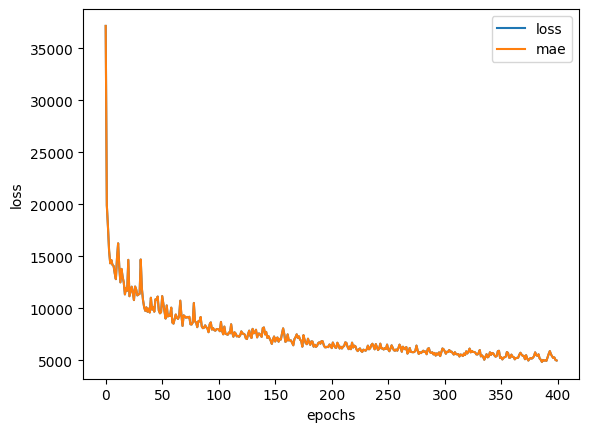

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

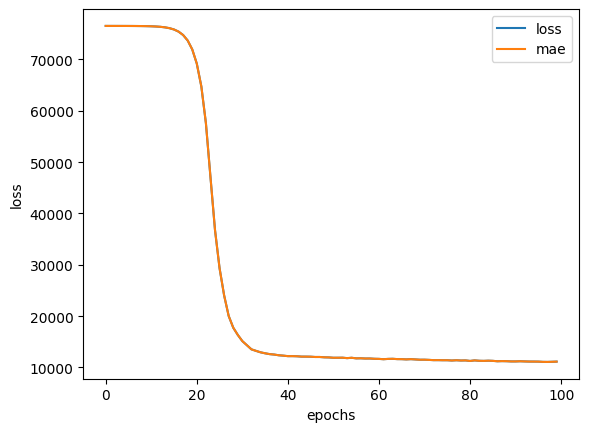

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **finding our learning rate**

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*0 **(epoch/20))
history2 =model_2.fit(x_train_scaled,y_train,epochs=400,callbacks=[lr_scheduler])


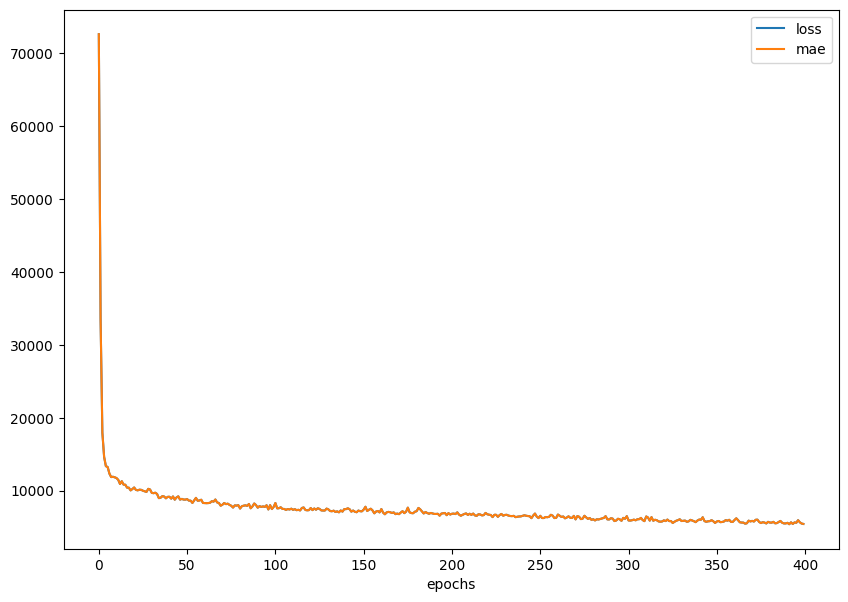

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,7),xlabel="epochs");

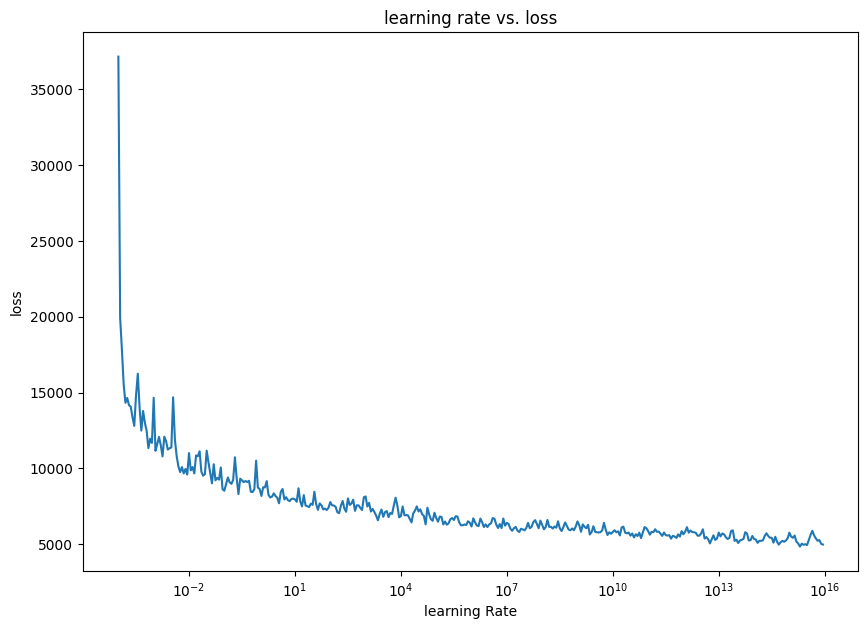

In [ ]:
lrs = 1e-4 * (10**(tf.range(400)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history2.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("learning rate vs. loss");

# **using random forest regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)


RandomForestRegressor()

In [ ]:
forest.score(x_test_scaled,y_test)

0.6534526021384154

In [ ]:
y_pred=forest.predict(x_test_scaled)

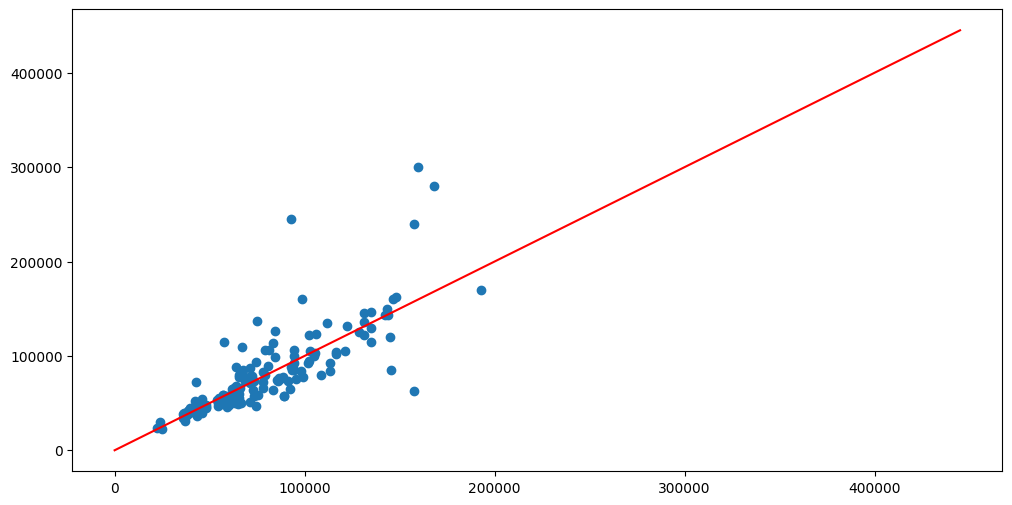

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_pred,y_test)
plt.plot(range(0,445000),range(0,445000),c="r")

In [ ]:
x_new = scaler.transform([x_test.iloc[100]])
forest.predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([46209.9])

In [ ]:
y_test.iloc[100]

45990